In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
#import torch_optimizer as optim
import numpy as np
import control as ctl
from scipy.io import loadmat
from scipy.io import savemat
from tqdm import tqdm

import matplotlib.pyplot as plt

from PacTimeOrig.Methods import ModelFitting as mf

In [2]:
dat = loadmat('/Users/user/PycharmProjects/PacManMain/data/Simulation/testerD.mat')


y=torch.tensor(dat['tester']['x'][0][0].astype('float32'))
A=torch.tensor(dat['tester']['A'][0][0].astype('float32'))
B=torch.tensor(dat['tester']['B'][0][0].astype('float32'))

init_y=(y[0,:])




In [3]:
#R1=np.array([2]).astype('float32')
#R2=np.array([2]).astype('float32')
R1=torch.tensor([69.0],requires_grad=True)
R2=torch.tensor([2.0912],requires_grad=True)

model = mf.LDSMIXTURELQR(init_y,A,B,input_dim=2,r1=R1,r2=R2)
criterion = mf.GaussianNLL()
#optimizer = optim.Adahessian(model.parameters(), lr=0.01,hessian_power=0.4)
optimizer = optim.Adam(model.parameters(), lr=0.01)
# Prepare the dataset

# Training loop
for epoch in tqdm(range(1000)):
    optimizer.zero_grad()
    x,yprime,u = model()
    loss = criterion(yprime[0:-1,:], y)
    loss=loss+(0.1*(torch.abs(torch.diff(x)).mean()))
    loss.backward(create_graph=True)
    #print(model.R1.requires_grad)
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')



/Users/user/PycharmProjects/PacManMain/PacTimeOrig/Methods/ModelFitting.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.init_y = torch.reshape(torch.tensor(init_y), [1, -1])[0]
/Users/user/PycharmProjects/PacManMain/PacTimeOrig/Methods/ModelFitting.py:402: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.R1 = nn.Parameter(torch.tensor(r1)) if r1 is not None else torch.nn.functional.softplus(
/Users/user/PycharmProjects/PacManMain/PacTimeOrig/Methods/ModelFitting.py:404: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.R2 = 

Epoch 0, Loss: 0.982454776763916


 12%|█▏        | 115/1000 [00:01<00:11, 77.27it/s]

Epoch 100, Loss: 0.9566841125488281


 22%|██▏       | 217/1000 [00:02<00:09, 79.99it/s]

Epoch 200, Loss: 0.9550175666809082


 31%|███       | 307/1000 [00:03<00:08, 81.48it/s]

Epoch 300, Loss: 0.9548898339271545


 41%|████      | 409/1000 [00:05<00:07, 79.80it/s]

Epoch 400, Loss: 0.9548748135566711


 52%|█████▏    | 517/1000 [00:06<00:05, 80.68it/s]

Epoch 500, Loss: 0.9548729062080383


 61%|██████    | 607/1000 [00:07<00:05, 69.72it/s]

Epoch 600, Loss: 0.9548726081848145


 71%|███████   | 712/1000 [00:09<00:03, 81.82it/s]

Epoch 700, Loss: 0.9548725485801697


 81%|████████  | 811/1000 [00:10<00:02, 80.54it/s]

Epoch 800, Loss: 0.9548726081848145


 91%|█████████ | 910/1000 [00:11<00:01, 82.43it/s]

Epoch 900, Loss: 0.9548725485801697


100%|██████████| 1000/1000 [00:12<00:00, 79.07it/s]


[tensor([0.1912], grad_fn=<MulBackward0>),
 Parameter containing:
 tensor([[-0.5661, -1.0664]], requires_grad=True)]

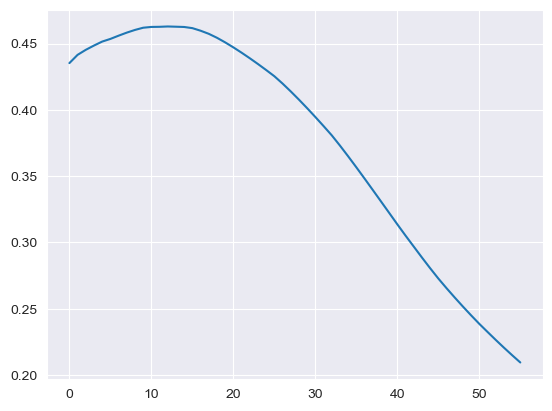

In [4]:
plt.plot(torch.sigmoid(x).detach().numpy())
[model.A,model.B]

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
#import torch_optimizer as optim
import numpy as np
import control as ctl
from scipy.io import loadmat
from scipy.io import savemat
from tqdm import tqdm

import matplotlib.pyplot as plt

from PacTimeOrig.Methods import ModelFitting as mf

dat = loadmat('/Users/user/PycharmProjects/PacManMain/data/Simulation/testerJ.mat')

y = torch.tensor(dat['tester']['x'][0][0].astype('float32'))
A = torch.tensor(dat['tester']['A'][0][0].astype('float32'))
B = torch.tensor(dat['tester']['B'][0][0].astype('float32'))
#Uncomment to provide the inputs
R1=torch.tensor(dat['tester']['R1'][0][0][0][0])
R2=torch.tensor(dat['tester']['R2'][0][0][0][0])
#R1=dat['tester']['R1'][0][0][0][0]+0.1
#R2=dat['tester']['R2'][0][0][0][0]+0.1


init_y = (y[0, :])

#Uncomment to provide the inputs
#model = mf.LDSMIXTURELQR(init_y,A,B,input_dim=1,r1=R1,r2=R2)

model = mf.LDSMIXTURELQR(init_y,A,B,input_dim=1,startW=torch.tensor([5]))
#criterion = mf.GaussianNLL()
criterion = nn.MSELoss()
#optimizer = optim.Adahessian(model.parameters(), lr=0.01,hessian_power=0.1)
optimizer = optim.Adam(model.parameters(), lr=0.01)
# Prepare the dataset

# Training loop
for epoch in tqdm(range(2000)):
    optimizer.zero_grad()
    x, yprime, u = model()
    loss = criterion(yprime[1:-1, :], y[1,:])
    loss = loss + (0.00000000001 * (torch.abs(torch.diff(x)).mean()))
    loss.backward(create_graph=True)
    #torch.nn.utils.clip_grad_norm_(model.parameters(), 5)
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


/Users/user/PycharmProjects/PacManMain/PacTimeOrig/Methods/ModelFitting.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.init_y = torch.reshape(torch.tensor(init_y), [1, -1])[0]
  0%|          | 0/2000 [00:00<?, ?it/s]/Users/user/anaconda3/envs/main/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([177, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
  0%|          | 4/2000 [00:00<01:49, 18.21it/s]

Epoch 0, Loss: 0.026084640994668007


  5%|▌         | 105/2000 [00:04<01:24, 22.42it/s]

Epoch 100, Loss: 0.01857319474220276


 10%|█         | 204/2000 [00:09<01:21, 21.98it/s]

Epoch 200, Loss: 0.0020958082750439644


 15%|█▌        | 303/2000 [00:13<01:17, 21.77it/s]

Epoch 300, Loss: 0.0020669300574809313


 20%|██        | 405/2000 [00:22<01:09, 22.98it/s]

Epoch 400, Loss: 0.002066931454464793


 25%|██▌       | 504/2000 [00:26<01:04, 23.34it/s]

Epoch 500, Loss: 0.002066930988803506


 30%|███       | 603/2000 [00:30<01:00, 23.05it/s]

Epoch 600, Loss: 0.002066930988803506


 35%|███▌      | 705/2000 [00:35<00:56, 23.11it/s]

Epoch 700, Loss: 0.002066930988803506


 40%|████      | 804/2000 [00:39<00:54, 21.93it/s]

Epoch 800, Loss: 0.002066930988803506


 45%|████▌     | 903/2000 [00:44<00:48, 22.59it/s]

Epoch 900, Loss: 0.002066930988803506


 50%|█████     | 1005/2000 [00:48<00:44, 22.43it/s]

Epoch 1000, Loss: 0.002066930988803506


 55%|█████▌    | 1104/2000 [00:53<00:40, 21.89it/s]

Epoch 1100, Loss: 0.002066930988803506


 60%|██████    | 1203/2000 [00:57<00:38, 20.97it/s]

Epoch 1200, Loss: 0.002066930988803506


 65%|██████▌   | 1305/2000 [01:02<00:31, 22.09it/s]

Epoch 1300, Loss: 0.002066930988803506


 70%|███████   | 1404/2000 [01:07<00:28, 21.13it/s]

Epoch 1400, Loss: 0.002066930988803506


 75%|███████▌  | 1503/2000 [01:11<00:22, 21.67it/s]

Epoch 1500, Loss: 0.002066930988803506


 80%|████████  | 1605/2000 [01:16<00:17, 22.23it/s]

Epoch 1600, Loss: 0.002066930988803506


 85%|████████▌ | 1704/2000 [01:20<00:13, 22.27it/s]

Epoch 1700, Loss: 0.002066930988803506


 90%|█████████ | 1803/2000 [01:25<00:09, 20.76it/s]

Epoch 1800, Loss: 0.002066930988803506


 95%|█████████▌| 1905/2000 [01:30<00:04, 21.76it/s]

Epoch 1900, Loss: 0.002066930988803506


100%|██████████| 2000/2000 [01:34<00:00, 21.16it/s]


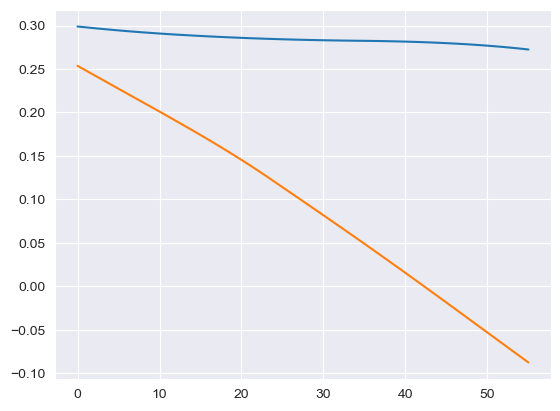

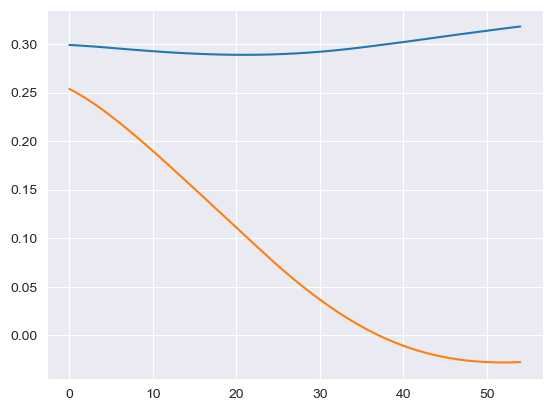

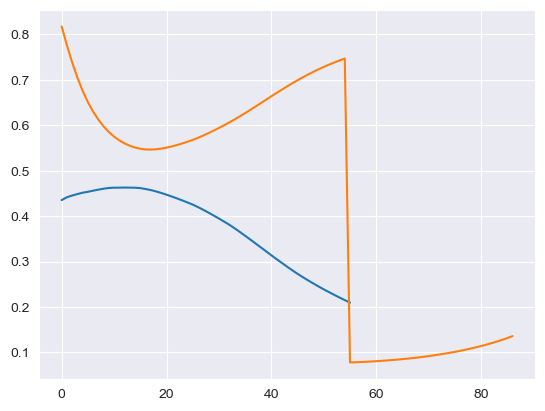

Parameter containing:
tensor([-0.2605], requires_grad=True)

In [5]:
plt.plot(yprime.detach().numpy())
plt.show()
plt.plot(y.detach().numpy())
plt.show()
plt.plot(torch.sigmoid(x).detach().numpy())
plt.plot(dat['tester']['shift'][0][0].astype('float32').T)
plt.show()


# Here I try to do use a stepwise optimization algorithm. It may help prevent error propagation when optimizing a whole sequence


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
#import torch_optimizer as optim
import numpy as np
import control as ctl
from scipy.io import loadmat
from tqdm import tqdm

import matplotlib.pyplot as plt

from PacTimeOrig.Methods import ModelFitting as mf

dat = loadmat('/Users/user/PycharmProjects/PacManMain/data/Simulation/testerM.mat')

y = torch.tensor(dat['tester']['x'][0][0].astype('float32'))
A = torch.tensor(dat['tester']['A'][0][0].astype('float32'))
B = torch.tensor(dat['tester']['B'][0][0].astype('float32'))

#Compute gains and pass as known (comment to learn them)
R1=dat['tester']['R1'][0][0][0][0]
R2=dat['tester']['R2'][0][0][0][0]
lqr1 = ctl.dlqr(1.0, 1.0/60.0, 1, R1)
lqr2 = ctl.dlqr(1.0, 1.0/60.0, 1, R2)
L1=lqr1[0][0][0]
L2=lqr2[0][0][0]

#needed for parameterizing size of w_init (could be a lot of parameters)
seqlen=np.max(y.shape)
input_dim=1
#initialize model
model = mf.LDSMIXTURELQRSTEP(seqlen,input_dim=input_dim,L1=L1,L2=L2)

criterion=nn.MSELoss()
#optimizer = optim.Adahessian(model.parameters(), lr=0.01,hessian_power=0.4)
optimizer = optim.Adam(model.parameters(), lr=0.01)


# Prepare the dataset
u1=(np.gradient(dat['tester']['x'][0][0][:,0].astype('float32'))*np.array(60.0))
u2=(np.gradient(dat['tester']['x'][0][0][:,1].astype('float32'))*np.array(60.0))
uin=np.stack([u1,u2]).T
uin=torch.tensor(uin)

# Training loop
for epoch in (range(1000)):
    total_loss = 0
    # Generate a shuffled array of time step indices
    t_indices = np.arange(1, seqlen-1)  # Assuming seqlen is the total length of your sequence
    np.random.shuffle(t_indices)
    for t in range(1, seqlen-1):
    #for t in t_indices:
        error1=torch.sqrt((y[t-1,:]-A[t-1,:]).pow(2).sum())
        error2=torch.sqrt((y[t-1,:]-B[t-1,:]).pow(2).sum())
        if input_dim==1:
            e_x=((error1-error2)).reshape(-1,1).float()
        elif input_dim==3:
            e_x=torch.stack((error1,error2,error1-error2)).reshape(-1,1).float()

        optimizer.zero_grad()
        u_pred=model(t,e_x,y[t,:],A[t,],B[t,])
        loss = criterion(u_pred, uin[t,:])
        #loss = loss + (0.5*torch.relu(model.gain1 - model.gain2))
        loss.backward(create_graph=True)
        optimizer.step()
        total_loss += loss.item()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {total_loss}')




In [ ]:
plt.plot((1/(1+torch.exp(model.initW)).detach().numpy().transpose()))
plt.show()
plt.plot(dat['tester']['shift'][0][0].astype('float32').T)
plt.show()
model.A

# Basis fit test

In [16]:
import torch
import torch.nn as nn
#import torch.optim as optim
import torch_optimizer as optim
import numpy as np
import control as ctl
from scipy.io import loadmat
from tqdm import tqdm

import matplotlib.pyplot as plt

from PacTimeOrig.Methods import ModelFitting as mf

dat = loadmat('/Users/user/PycharmProjects/PacManMain/data/Simulation/testerK.mat')

y = torch.tensor(dat['tester']['x'][0][0].astype('float32'))
A = torch.tensor(dat['tester']['A'][0][0].astype('float32'))
B = torch.tensor(dat['tester']['B'][0][0].astype('float32'))

#Compute gains and pass as known (comment to learn them)
R1=dat['tester']['R1'][0][0][0][0]
R2=dat['tester']['R2'][0][0][0][0]
lqr1 = ctl.dlqr(1.0, 1.0/60.0, 1, R1)
lqr2 = ctl.dlqr(1.0, 1.0/60.0, 1, R2)
L1=lqr1[0][0][0]
L2=lqr2[0][0][0]


nRBF=41
model = mf.RBFMIXTURELQR(y, A, B, A_prime=1, B_prime=1 / 60, nRBF=nRBF)

criterion=nn.MSELoss()
optimizer = optim.Adahessian(model.parameters(), lr=0.01,hessian_power=0.4)
#optimizer = optim.Adam(model.parameters(), lr=0.01)


# %compute smoothness constraint in weights
LAP=2*torch.eye(nRBF)
LAP[0,0]=1.0
LAP[-1,-1]=1.0

matrix = torch.zeros(nRBF, nRBF)

# Fill in the superdiagonal with -1s
rows, cols = torch.diag(torch.full((nRBF - 1,), -1), diagonal=1).nonzero(as_tuple=True)
matrix[rows, cols] = -1

# Fill in the subdiagonal with -1s
rows, cols = torch.diag(torch.full((nRBF - 1,), -1), diagonal=-1).nonzero(as_tuple=True)
matrix[rows, cols] = -1

LAP=LAP+matrix


for epoch in (range(2000)):
    optimizer.zero_grad()
    y_pred, u_pred = model()
    loss = criterion(y_pred[1:, :], y[1:,:])
    loss=loss+0.00001*(model.weights.T @ LAP @ model.weights)
    #loss = loss + (0.00001 * (torch.abs(torch.diff(x)).mean()))
    loss.backward(create_graph=True)
    #torch.nn.utils.clip_grad_norm_(model.parameters(), 5)
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 0.1896708905696869
Epoch 100, Loss: 0.10754061490297318
Epoch 200, Loss: 0.06507638841867447
Epoch 300, Loss: 0.045065250247716904
Epoch 400, Loss: 0.03579718992114067
Epoch 500, Loss: 0.03140607103705406
Epoch 600, Loss: 0.02920626290142536
Epoch 700, Loss: 0.027980422601103783
Epoch 800, Loss: 0.027187049388885498
Epoch 900, Loss: 0.02659234218299389
Epoch 1000, Loss: 0.02608828991651535
Epoch 1100, Loss: 0.025629794225096703
Epoch 1200, Loss: 0.025195591151714325
Epoch 1300, Loss: 0.02477733977138996
Epoch 1400, Loss: 0.024372953921556473
Epoch 1500, Loss: 0.02397904545068741
Epoch 1600, Loss: 0.0235952939838171
Epoch 1700, Loss: 0.023220501840114594
Epoch 1800, Loss: 0.022855674847960472
Epoch 1900, Loss: 0.02249998226761818


Text(0.5, 1.0, 'recovered position series')

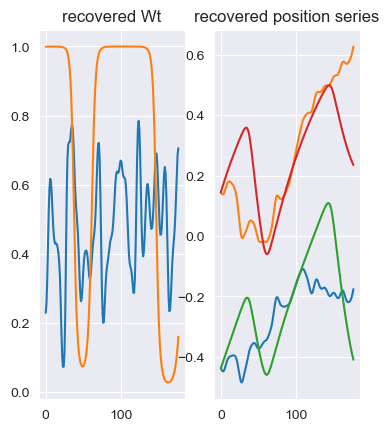

In [17]:
with torch.no_grad():
    y_pred, u_pred = model()
tmp=model.get_wt()
plt.subplot(1,3,1)
plt.plot(1-tmp.detach().numpy())
plt.plot(dat['tester']['shift'][0][0].astype('float32').T)
plt.title('recovered Wt')
plt.subplot(1,3,2)
plt.plot(y_pred.detach().numpy())
plt.plot(y.detach().numpy())
plt.title('recovered position series')

#plt.subplot(1,3,3)
#plt.plot(u_pred.detach().numpy())
#plt.title('recovered control series')



In [9]:
model.gain1

tensor([0.8509], grad_fn=<ExpBackward0>)

In [10]:
model.gain2

tensor([1.0202], grad_fn=<ExpBackward0>)

In [33]:
import numpy as np
from scipy.optimize import minimize
# Simulation parameters
x_target = 1.0  # Target position
T = 10.0  # Total time
dt = 0.01  # Time step
N = int(T / dt)  # Number of time steps
lambda_list=np.linspace(0.0000001,0.03,20)
xtmp=[]
for ii,lambda_ in enumerate(lambda_list):
    # Cost function J to minimize
    def cost_function(params):
        Kp, Ki = params
        x = 0.0  # Initial position
        integral_error = 0.0
        J = 0.0
        for i in range(N):
            error = x_target - x
            integral_error += error * dt
            u = Kp * error + Ki * integral_error
            # Update the position for simplicity, assume u directly translates to position change
            x += u * dt
            J += (error ** 2 + lambda_ * u ** 2) * dt
        return J
    # Initial guess for Kp, Ki
    initial_guess = [0.1, 0.01]
    # Optimization
    result = minimize(cost_function, initial_guess, method='L-BFGS-B')
    xtmp.append(result.x)


/var/folders/tv/_yg34tj15s306l4m7k_wf0qw0000gq/T/ipykernel_2510/1825077948.py:2: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(np.stack(xtmp)[:,0]),np.log(np.stack(xtmp)[:,1]))


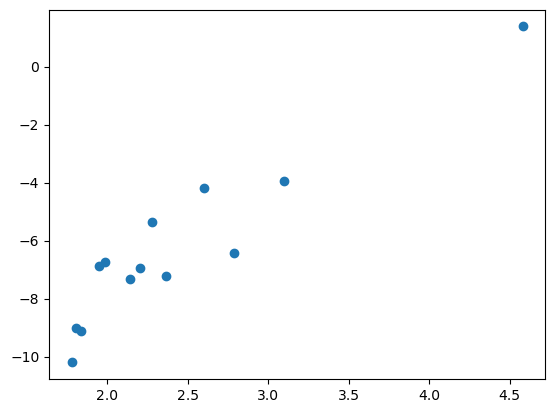

In [34]:
import matplotlib.pyplot as plt
plt.scatter(np.log(np.stack(xtmp)[:,0]),np.log(np.stack(xtmp)[:,1]))

In [35]:
np.log(2)

0.6931471805599453

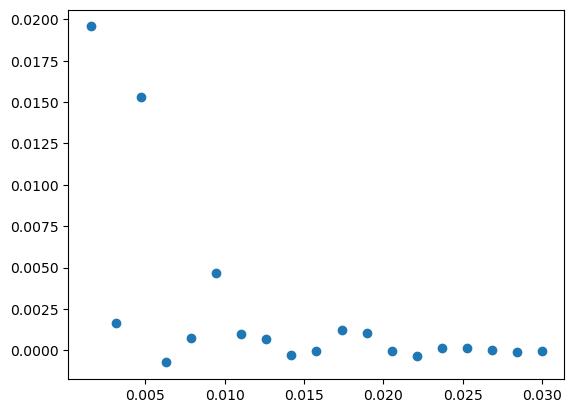

In [36]:
plt.scatter(lambda_list[1:],np.stack(xtmp)[1:,1])

In [37]:
np.stack(xtmp)[:,1]

array([ 3.99678099e+00,  1.95744443e-02,  1.63054661e-03,  1.53104328e-02,
       -7.39458805e-04,  7.37917595e-04,  4.66568547e-03,  9.58381359e-04,
        6.50868281e-04, -2.60575104e-04, -1.85764386e-05,  1.19573764e-03,
        1.02811055e-03, -2.46370458e-05, -3.26637491e-04,  1.10880732e-04,
        1.23276779e-04,  3.71336049e-05, -1.22121479e-04, -2.88764826e-05])